### PCA

In [1]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict

### PCA on beer reviews ###

def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

print "Reading data..."
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print "done"

Reading data...
done


In [11]:
X = [[x['review/overall'], x['review/taste'], x['review/aroma'], x['review/appearance'], x['review/palate']] for x in data]

In [12]:
X[:10]

[[1.5, 1.5, 2.0, 2.5, 1.5],
 [3.0, 3.0, 2.5, 3.0, 3.0],
 [3.0, 3.0, 2.5, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.5, 2.5],
 [4.0, 4.5, 4.5, 4.0, 4.0],
 [3.0, 3.5, 3.5, 3.5, 3.0],
 [3.5, 4.0, 3.5, 3.5, 4.0],
 [3.0, 3.5, 2.5, 3.5, 2.0],
 [4.0, 4.0, 3.0, 3.5, 3.5],
 [4.5, 4.0, 3.5, 5.0, 4.0]]

In [5]:
pca = PCA(n_components=5)
pca.fit(X)
print pca.components_

[[-0.48201817 -0.51561105 -0.44450326 -0.32114146 -0.44842921]
 [-0.46600016 -0.26162178  0.31604305  0.78071848 -0.07066358]
 [-0.18730152  0.11729702  0.78013615 -0.424744   -0.4026657 ]
 [-0.5195416  -0.09404298  0.11758039 -0.31877216  0.77832615]
 [ 0.49547654 -0.80193305  0.28301251 -0.07296345  0.16120371]]


In [6]:
psi = numpy.matrix(pca.components_)

In [9]:
psi[0] * psi[0].T

matrix([[1.]])

### Network visualization 

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Karate club
G = nx.karate_club_graph()
nx.draw(G)
plt.show()
plt.clf()

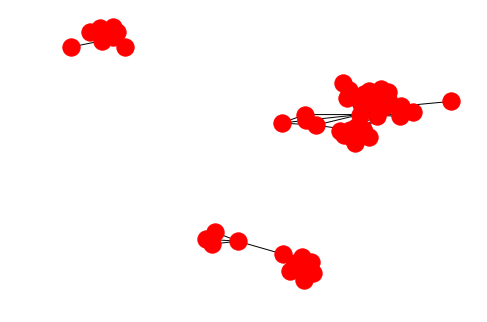

In [57]:
edges = set()
nodes = set()
for edge in urllib.urlopen("http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt", 'r'):
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  edges.add((y,x))
  nodes.add(x)
  nodes.add(y)

G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

### Find all 3 and 4-cliques in the graph 

In [58]:
cliques3 = set()
cliques4 = set()
for n1 in nodes:
  for n2 in nodes:
    if not ((n1,n2) in edges): continue
    for n3 in nodes:
      if not ((n1,n3) in edges): continue
      if not ((n2,n3) in edges): continue
      clique = [n1,n2,n3]
      clique.sort()
      cliques3.add(tuple(clique))
      for n4 in nodes:
        if not ((n1,n4) in edges): continue
        if not ((n2,n4) in edges): continue
        if not ((n3,n4) in edges): continue
        clique = [n1,n2,n3,n4]
        clique.sort()
        cliques4.add(tuple(clique))

In [59]:
cliques3

{(697, 708, 713),
 (697, 708, 719),
 (697, 708, 747),
 (697, 708, 753),
 (697, 708, 769),
 (697, 708, 800),
 (697, 708, 819),
 (697, 708, 823),
 (697, 708, 828),
 (697, 708, 830),
 (697, 708, 840),
 (697, 708, 856),
 (697, 708, 890),
 (697, 713, 719),
 (697, 713, 745),
 (697, 713, 747),
 (697, 713, 772),
 (697, 713, 800),
 (697, 713, 805),
 (697, 713, 819),
 (697, 713, 823),
 (697, 713, 828),
 (697, 713, 830),
 (697, 713, 840),
 (697, 719, 745),
 (697, 719, 747),
 (697, 719, 772),
 (697, 719, 800),
 (697, 719, 805),
 (697, 719, 819),
 (697, 719, 823),
 (697, 719, 828),
 (697, 719, 830),
 (697, 719, 840),
 (697, 745, 747),
 (697, 745, 800),
 (697, 745, 805),
 (697, 745, 823),
 (697, 745, 828),
 (697, 745, 830),
 (697, 747, 753),
 (697, 747, 769),
 (697, 747, 800),
 (697, 747, 805),
 (697, 747, 819),
 (697, 747, 823),
 (697, 747, 828),
 (697, 747, 830),
 (697, 747, 840),
 (697, 747, 856),
 (697, 753, 769),
 (697, 753, 819),
 (697, 753, 823),
 (697, 753, 856),
 (697, 753, 890),
 (697, 769

In [50]:
x=[1,2,3,4,5,6] 
y=[8,9,10,11,12,13]
i = 0

In [53]:
def find(list1,list2):
    C= list1[0]+ list2[0]
    for x in list1:
        for y in list2:
            D = x + y
            if D < C:
                C = D
                dic = {"x":x,"y":y,"C":C}
    return dic
